
- Datetime index
- Unir dataframes
- Esatística univariada
- Estatística bivariada

RJ0069RA002.csv
SP0063RA002.csv


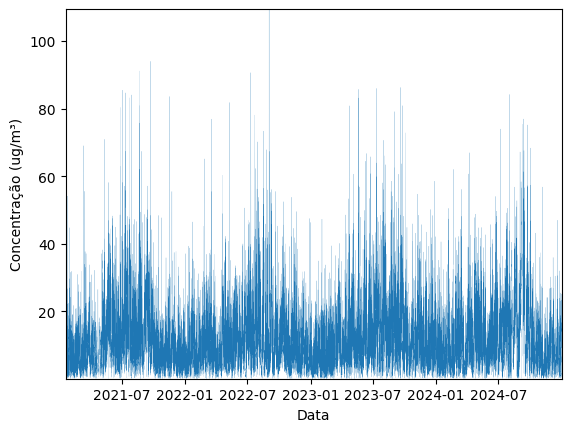

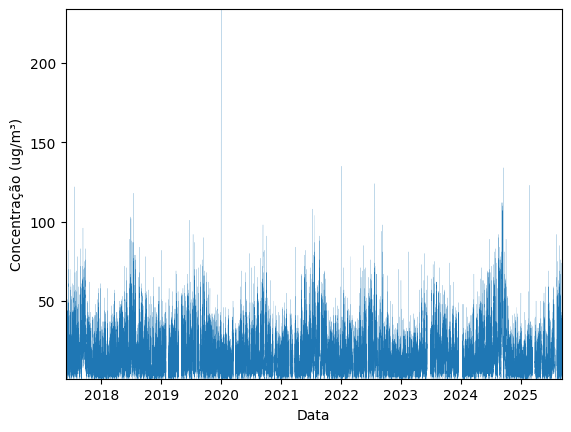

In [51]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Listando os arquivos dentro da pasta de dados
files = os.listdir(r"C:\Users\leti_\OneDrive\Documentos\python_env_app")
files = [ fname for fname in files if fname.endswith('.csv')]
files

# loop em cada arquivo csv
for file in files:
    print(file)

    # Abre o arquivo
    df = pd.read_csv(r"C:\Users\leti_\OneDrive\Documentos\python_env_app"+'/'+file)

    # Formata a coluna datetime
    df['DATETIME'] = pd.to_datetime(df['DATETIME'])
    
    # Criando uma figura
    fig, ax = plt.subplots()
    ax.plot(df.DATETIME, df.VALOR, linewidth = 0.1)
    ax.set_xlim([df.DATETIME.min(), df.DATETIME.max()])
    ax.set_ylim([df.VALOR.min(), df.VALOR.max()])
    ax.set_ylabel('Concentração (ug/m³)')
    ax.set_xlabel('Data')
    fig.savefig(r"C:\Users\leti_\OneDrive\Documentos\python_env_app\outputs"+'/'+file.split('.')[0]+'.png')

##### **Criando um dataframe com várias colunas de dados**

In [52]:
df.head()

,DATETIME,ANO,MES,DIA,HORA,VALOR,VALOR_ORIGINAL,UNIDADE,QAQC_INTERNO,QAQC_MMA
0,2017-05-29 01:00:00,2017,5,29,1,42.0,42.0,µg/m3,True,True
1,2017-05-29 02:00:00,2017,5,29,2,49.0,49.0,µg/m3,True,True
2,2017-05-29 03:00:00,2017,5,29,3,42.0,42.0,µg/m3,True,True
3,2017-05-29 04:00:00,2017,5,29,4,34.0,34.0,µg/m3,True,True
4,2017-05-29 05:00:00,2017,5,29,5,26.0,26.0,µg/m3,True,True


In [53]:
# merge dataframe by datetime index

# loop em cada arquivo csv
df_list=[]
for ii, file in enumerate(files):
    print(file)
    print(ii)

    # Abre o arquivo
    df = pd.read_csv(r"C:\Users\leti_\OneDrive\Documentos\python_env_app"+'/'+file)

    # Formata a coluna datetime
    df['DATETIME'] = pd.to_datetime(df['DATETIME'])
    df = df.set_index(df['DATETIME'])
    df = df[['VALOR']]
    df.rename(columns={'VALOR': file.split('.')[0]}, inplace=True)
    df_list.append(df)

df = pd.concat(df_list, axis=1)

df.head()

RJ0069RA002.csv
0
SP0063RA002.csv
1


,RJ0069RA002,SP0063RA002
DATETIME,,
2017-05-29 01:00:00,NaN,42.0
2017-05-29 02:00:00,NaN,49.0
2017-05-29 03:00:00,NaN,42.0
2017-05-29 04:00:00,NaN,34.0
2017-05-29 05:00:00,NaN,26.0


C:\Users\leti_\AppData\Local\Temp\ipykernel_22148\842889164.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


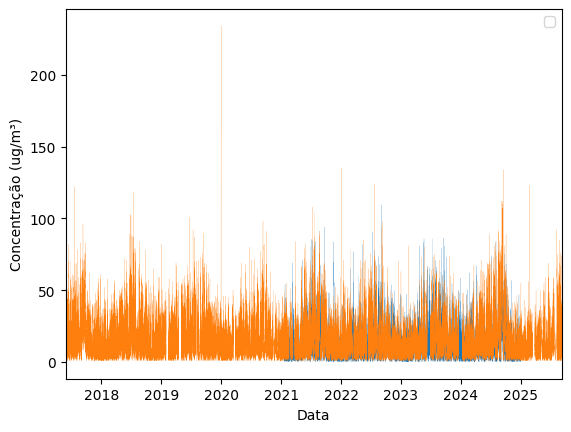

In [66]:
# Plotando as séries que armazenamos

# Criando uma figura
fig, ax = plt.subplots()
ax.plot(df.index, df.iloc[:,0:], linewidth = 0.1)
ax.set_xlim([df.index.min(), df.index.max()])
#ax.set_ylim([df.iloc[:,3:].min(), df.iloc[:,3:].max()])
ax.set_ylabel('Concentração (ug/m³)')
ax.set_xlabel('Data')
ax.legend()
fig.savefig(r"C:\Users\leti_\OneDrive\Documentos\python_env_app\outputs"+'/'+file.split('.')[0]+'.png')

In [70]:
# salvando csv

df.to_csv(r"C:\Users\leti_\OneDrive\Documentos\python_env_app\outputs"+'/'+'df.csv')

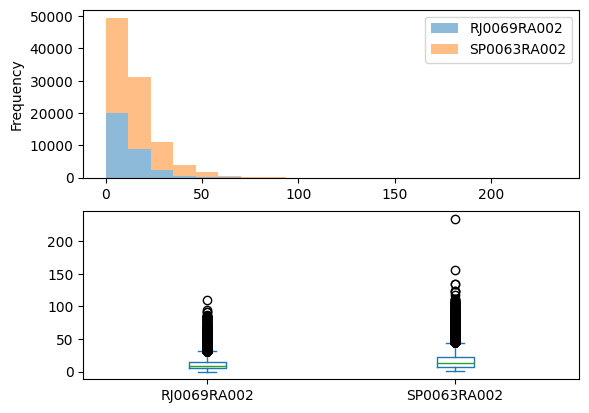

In [67]:
# Histograma e boxplot

fig,ax = plt.subplots(2)

df.plot.hist(stacked=True, bins=20,alpha=0.5, ax=ax[0]);
df.plot.box(ax=ax[1]);

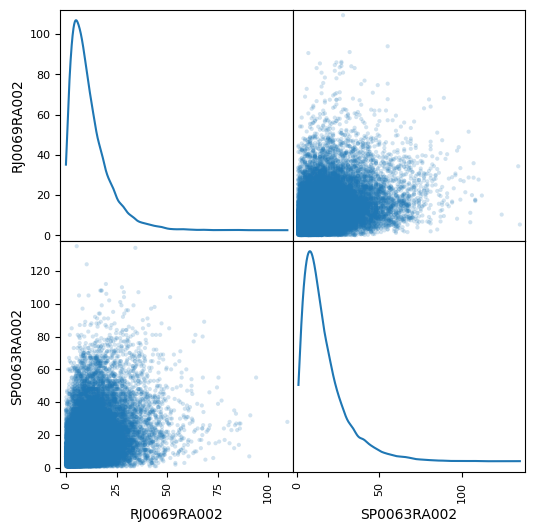

In [59]:
# Scatter matriz

from pandas.plotting import scatter_matrix
scatter_matrix(df.dropna(), alpha=0.2, figsize=(6, 6), diagonal="kde");

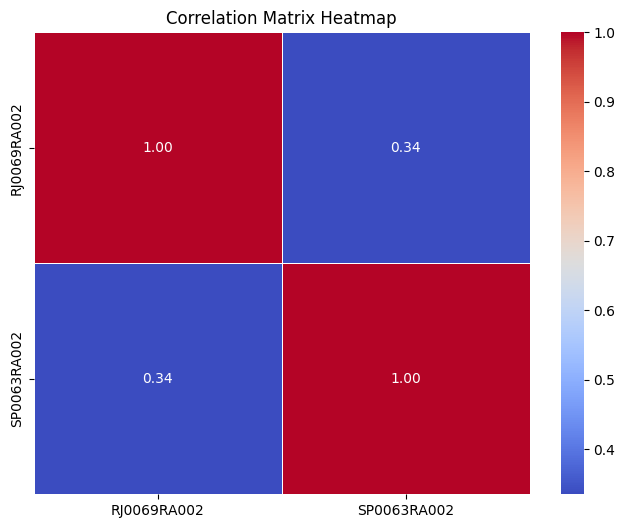

In [64]:
#correlação matriz
import seaborn as sns

correlation_matrix = df.corr()
#correlation_matrix

#plt.figure(figsize=(8, 6)) # Adjust figure size as needed
 #   sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
  #  plt.title('Correlation Matrix Heatmap')
   # plt.show()

# 3. Create the heatmap
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(
    correlation_matrix,
    annot=True,      # Show the correlation values on the heatmap
    cmap='coolwarm', # Choose a colormap (e.g., 'coolwarm', 'viridis', 'plasma')
    fmt=".2f",       # Format the annotation values to two decimal places
    linewidths=.5    # Add lines between cells
)
plt.title('Correlation Matrix Heatmap')
plt.show()